In [314]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from scipy.io import loadmat
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [315]:
digits = load_digits()

In [316]:
mat=loadmat("ex3data1.mat")
X=mat["X"]
y=mat["y"]

mat2 = loadmat('ex3weights.mat')
theta1 = mat2['Theta1']#shape = 25 x 401
theta2 = mat2['Theta2']#shape = 10 x 26

In [317]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [318]:
def predict(theta1, theta2, X):
    m = X.shape[0]
    X = np.hstack((np.ones((m,1)), X))

    a1 = sigmoid(np.dot(X, theta1.T))
    a1 = np.hstack((np.ones((m,1)), a1))
    a2 = sigmoid(np.dot(a1, theta2.T))

    return np.argmax(a2, axis = 1)+1#ask on stackoverflow

In [319]:
pred2 = predict(theta1, theta2, X)
print("Training Set Accuracy:",sum(pred2[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 97.52 %


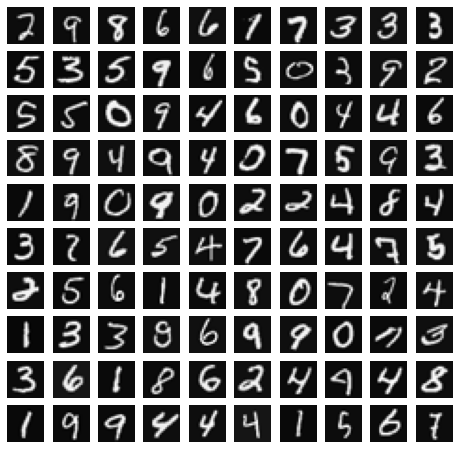

In [320]:
fig, axis = plt.subplots(10, 10, figsize = (8, 8))
plt.gray()
for i in range(10):
        for j in range(10):
            axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F")) 
            axis[i,j].axis("off")

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [322]:
clf = MLPClassifier(solver='lbfgs', alpha=0.00001, hidden_layer_sizes=(25,), random_state=1)

In [323]:
clf.fit(X_train, y_train.ravel())

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(25,), random_state=1,
              solver='lbfgs')

In [324]:
print(clf.score(X, y)*100,"%")

97.92 %


In [325]:
y_predicted = clf.predict(X)
cm = confusion_matrix(y, y_predicted)
cm

array([[496,   2,   0,   0,   0,   0,   0,   2,   0,   0],
       [  1, 492,   3,   1,   0,   0,   0,   3,   0,   0],
       [  0,   5, 486,   0,   1,   0,   1,   6,   1,   0],
       [  0,   1,   0, 491,   0,   3,   1,   0,   3,   1],
       [  0,   0,   4,   2, 483,   0,   3,   4,   2,   2],
       [  0,   2,   0,   1,   0, 495,   1,   0,   1,   0],
       [  4,   1,   2,   0,   0,   0, 489,   0,   4,   0],
       [  1,   0,   1,   1,   2,   3,   1, 490,   1,   0],
       [  1,   0,   2,   9,   1,   0,   4,   2, 480,   1],
       [  0,   0,   0,   0,   3,   0,   1,   1,   1, 494]])

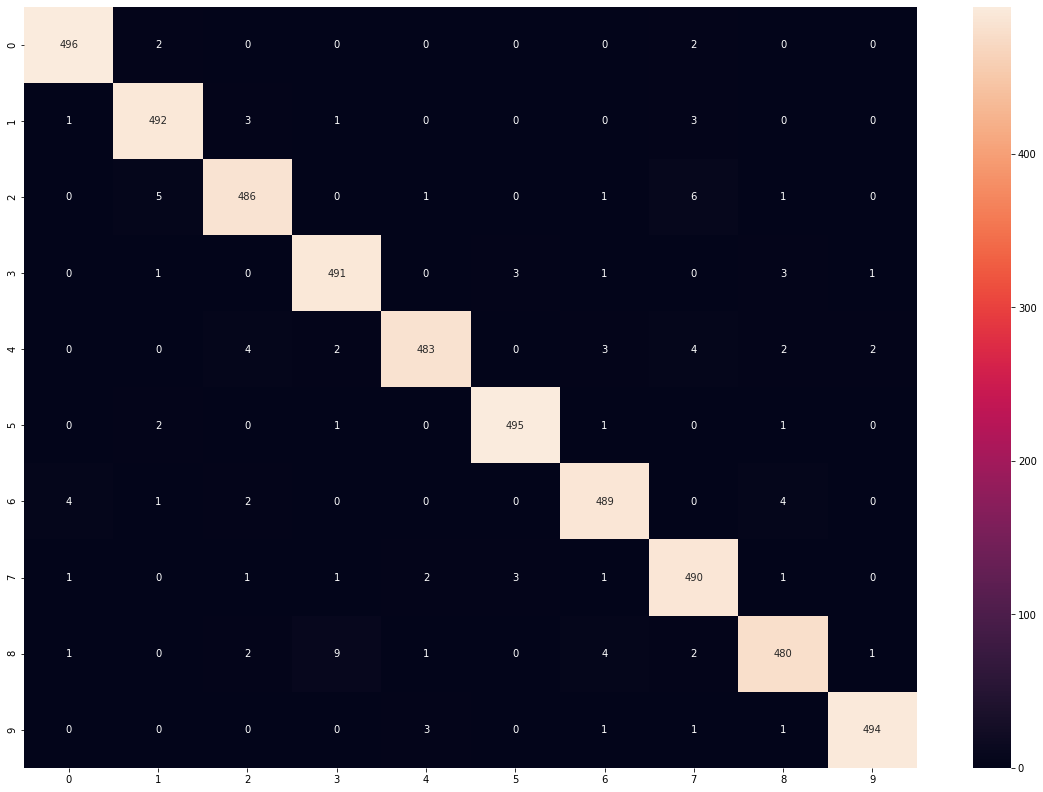

In [326]:
import seaborn as sn
plt.figure(figsize = (20,14))
sn.heatmap(cm, annot = True, fmt = 'g')#fmt = 'g' shows full int else it would be in 4.92e+100 form
plt.show()